In [49]:
# This notebook takes the model_stats csv files and plots average weekly sentiment for each city
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib notebook

In [70]:
bos = pd.read_csv('model_csvs/bos_model_stats.csv')
chi = pd.read_csv('model_csvs/chi_model_stats.csv')
mia = pd.read_csv('model_csvs/mia_model_stats.csv')
nyc = pd.read_csv('model_csvs/nyc_model_stats.csv')

In [71]:
def plot_avg_sentiment(df, label):
    temp_df = df
    temp_df['date'] = temp_df['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x))
    temp_df.set_index('date', inplace=True)
    weekly_avg = temp_df['sentiment_p_title'].resample('W').mean()
    plt.plot(weekly_avg, label = label)
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((x1, x2, .4, .8))
    return weekly_avg

<IPython.core.display.Javascript object>


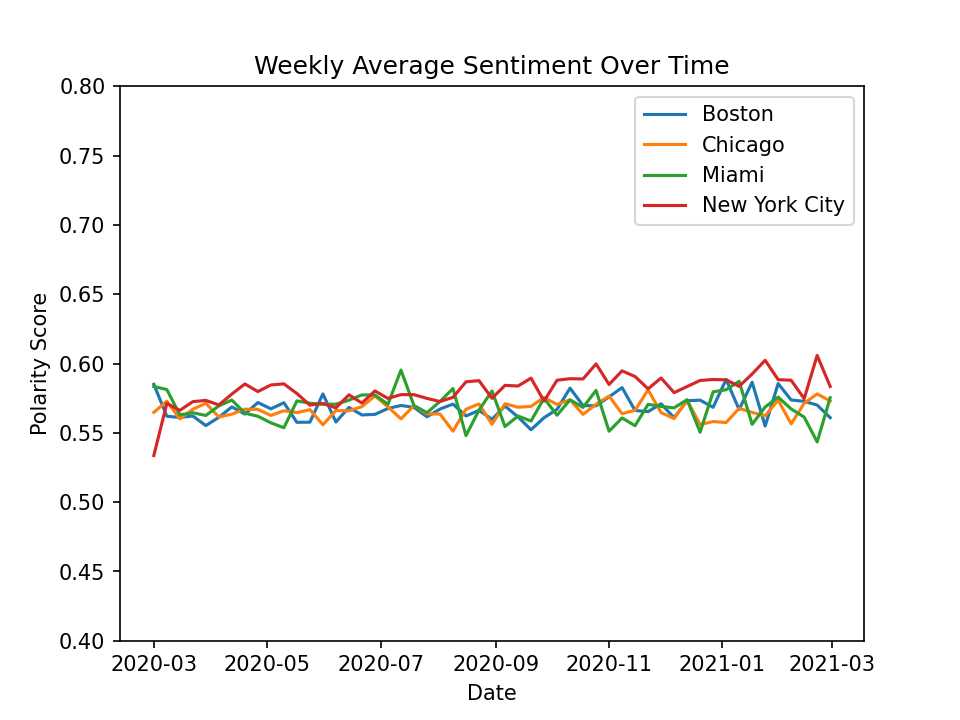

Text(0.5, 0, 'Date')

In [75]:
bos_sentiment = plot_avg_sentiment(bos, "Boston")
chi_sentiment = plot_avg_sentiment(chi, "Chicago")
mia_sentiment = plot_avg_sentiment(mia, "Miami")
nyc_sentiment = plot_avg_sentiment(nyc, "New York City")
plt.legend()
plt.title('Weekly Average Sentiment Over Time')
plt.ylabel('Polarity Score')
plt.xlabel('Date')

In [74]:
plt.savefig("Polarity_over_time.png")

In [80]:
# For D3
sentiment = pd.concat([bos_sentiment, mia_sentiment, nyc_sentiment, chi_sentiment], axis=1)
sentiment.columns = (['Boston', 'Miami', 'New York City', 'Chicago'])
sentiment.to_csv('sentiment_data.csv')